In [17]:
import pandas as pd

chi_food = pd.read_csv('~/capp30122/proj-chicago-eats/chicagoeats/data/food_source_final.csv')

north_zipcodes = [60660, 60626, 60645, 60659, 60646, 60631, 60656, 60630, 60625, 60634, 60641, 
60618, 60657, 60613, 60640, 60651, 60622, 60614, 60647, 60639]

west_zipcodes = [60644, 60624, 60612]

downtown_zipcodes = [60601, 60602, 60603, 60604, 60605, 60606, 60607, 60610, 60611, 60661, 60654]

south_zipcodes = [60628, 60608, 60616, 60653, 60615, 60609, 60632, 60638, 60629, 60636, 60621, 
60637, 60652, 60620, 60619, 60628, 60643, 60655, 60827]

east_zipcodes = [60649, 60617, 60633]

#2013 Data
North_zip= chi_food[chi_food.zip.isin(north_zipcodes)]
North_2013 = North_zip[North_zip['year'] == 2013]

North_2013_Restaurants = North_2013[North_2013['category'] == 'Restaurant']
North_2013_Grocery = North_2013[North_2013['category'] == 'Grocery Store']
North_2013_Liquor = North_2013[North_2013['category'] == 'Liquor Store']
North_2013_Convenience = North_2013[North_2013['category'] == 'Convenience Store/Gas Station']

#proportions
north_rest_percent = len(North_2013_Restaurants)/len(North_2013)
north_groc_percent = len(North_2013_Grocery)/len(North_2013)
north_liq_percent = len(North_2013_Liquor)/len(North_2013)
north_conv_percent = len(North_2013_Convenience)/len(North_2013)

a = north_rest_percent + north_groc_percent + north_liq_percent + north_conv_percent



1.0

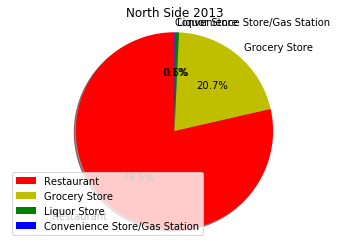

In [20]:
import matplotlib.pyplot as plt
 
# defining labels
region_categories = ['Restaurant', 'Grocery Store', 'Liquor Store', 'Convenience Store/Gas Station']
 
# portion covered by each label
categories_percents = [north_rest_percent, north_groc_percent, north_liq_percent, north_conv_percent]
 
# color for each label
colors = ['r', 'y', 'g', 'b']
 
# plotting the pie chart
plt.pie(categories_percents, labels = region_categories, colors=colors, startangle=90, shadow = True, 
explode = (0, 0, 0, 0), radius = 1.2, autopct = '%1.1f%%')


 

plt.title('North Side 2013')

plt.axis('equal')
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

